# 画像検索

参考:
* Solem, J. E. (2013). <I>Programming Computer Vision with Python.</I> (Chap. 7). O'Reilly. (相川愛三訳(2013)「実践コンピュータビジョン」オライリージャパン)
* https://www.pyimagesearch.com/2014/12/01/complete-guide-building-image-search-engine-python-opencv/

## 画像検索とは
Googleのような検索エンジンではキーワード（単語）をクエリとして与えて「画像」を検索できる。画像検索とはクエリとして単語ではなく画像を使用した検索エンジンのことをさす。

一般に、(1)メタデータによる検索, (2)画像による検索、(3)(1)と(2)のハイブリッド、という3種類の方法がある。

## メタデータによる検索
メタデータシステムによる検索は、画像ではなく、（1）Webページ上の画像の近くに表示されるテキストのような自動コンテキストヒントや、（2）手作業による注釈付けや人間によるタグ付けなど、というテキストの手掛かりによるものである。

検索では、従来のテキスト検索エンジンと同様に単語としてユーザーが与えたクエリをもとに、それに似たタグや注釈を持つ画像が返される。

この典型例は http://www.flickr.com/ である。Flickrに画像をアップロードすると、アップロードした画像の内容を説明するタグを入力するためのテキストフィールドが表示される。
Flickrはこれらのキーワードを取得して索引付けし、関連する他の画像を検索して推奨してくる。



## 例による検索

例による検索は、画像の内容だけを用いた検索であるため、キーワードは提供されない。画像は、解析され、量子化され、類似の画像を検索できるような形で保存される。このような形の画像検索を「内容に基づく画像検索」(Content-Based Image Retrieval, CBIR)という。つまり、テキストではなく画像の内容に厳密に依存して画像検索を行うシステムである。

この例は https://www.tineye.com/ である。TinEye は画像をアップすると、その画像と似たような画像があるウェブページを表示する。

## ハイブリッド検索

ハイブリッドアプローチは、画像から抽出された特徴をキストと相関させる。このアプローチを使用すると、メタデータによる検索と例による検索の両方の手段をもつ画像検索が実現できる。その例は Google の画像検索である。


## 画像検索のための用語

画像検索エンジンを構築するには、まず大量の画像データセットに対し、それぞれの画像を索引付け(インデックス）する必要がある。この索引付けとは、それぞれの画像から画像記述子を用いて特徴量を抽出するというデータセットの量子化プロセスのことである。

画像記述子は  画像を記述するために用いるアルゴリズムを決定する。
例えば：
* 赤、緑、青の各チャネルの平均および標準偏差
* 形状を特徴付ける画像の統計的特徴量(モーメント)
* 形状とテクスチャの両方を表す勾配の大きさと方向

ここで重要なのは、「画像記述子が画像の定量化を決める」ということである。

一方、特徴量は画像記述子の出力である。画像を画像記述子に与えると 特徴量が得られる、という関係である。

最も基本的な用語、特徴(または特徴ベクトル）とは、画像を抽象的な表現し定量化に使用されるための数の並びのことである。

これらのイメージは:  画像 → 画像記述子の適用 → 特徴ベクトル$[0.31, 0.72, 0.93,\ldots,0.86]$

特徴ベクトルは、距離尺度関数や類似度関数を用いて類似性を比較できる。距離尺度関数や類似度関数は２つの特徴ベクトルを入力とし、それらがどの程度似ているかを表す数を出力する。


## 内容に基づく画像検索システムの手順

1. 画像記述子を定義: 画像のどの部分を記述するかを決定する。画像の色、画像内のオブジェクトの形状、テクスチャなど
2. データセットの索引付: うえで定義した画像記述子をデータセットに適用し、個々の画像から特徴ベクトルを抽出し、それらをデータベースに格納して、後で類似性を用いて比較できるようにする
3. 類似度を定義: ユークリッド距離、コサイン距離、カイ二乗距離などの類似度尺度の選択肢から選ぶ。選択はデータセットと、抽出した特徴のタイプに依存する。
4. 検索: 最後のステップとして、クエリとして与えられた画像から特徴量を抽出し、類似度関数を用いて、索引付されている特徴に対し照会を行い、最も関連の高い画像を返す

用いるデータ・セット: http://lear.inrialpes.fr/people/jegou/data.php

## 個人用画像検索エンジンの構築

画像記述子として、SIFT記述子のような局所記述子を用いる方法がある(Solem,2013)。これは画像データセットに対し局所記述子を適用し、記述子を多数集め、それをクラスタリングする。そのクラスタ一つ一つを「ワード」とみなし、画像をこのワードの集まりとして位置づける方法である。つまり、これはテキスト検索の視覚版といえる。画像では「ワード」のような離散的な記述子がないので、局所記述子をクラスタリングすることで擬似的な「ワード」を作り出す、という方法である。このワードのことを visual word という。クラスタリングとしてはk平均法が用いられる。

ここでは、https://www.pyimagesearch.com/2014/12/01/complete-guide-building-image-search-engine-python-opencv/ に従い、「簡単で効果的」な画像記述子である色ヒストグラムを使用する。これにより画像の色分布が似ている画像は（たとえ映っている物体が異なるものであっても）「類似」と判断されることになる。

### ステップ1. 画像記述子の定義
ここで採用する画像記述子は、HSV色空間(色相、彩度、値）の3次元カラーヒストグラムである。通常色はRGBの３組で表されるが、HSV色空間のほうが人間による色の知覚に近いと言われている(これ以外にもCIE L*a*b* やCIE XYZ 色空間という候補がある）。

参考: http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

次に、ヒストグラムのビン数(量子化数)を定義する。ヒストグラムは、画像内の画素強度の濃度の(大雑把な）感覚を与えるために使用される。本質的にここでのヒストグラムは、画像I中の画素の色Cの確率Pを推定したものとなる。ここでビン数が少ないと画像の区別が困難になり、多すぎると画像が細かく分類されることになり「似ている」はずの画像も「似ていない」と判定される可能性が起こる。そのため、対象とするデータセットにおいて実験的に最適なビン数を求めることが必要になる。

画像記述子のクラスを定義する。HSV色空間で、色相チャンネルの8ビン、彩度チャンネルの12ビン、値チャンネルの3ビンからなる3D色ヒストグラムを作ることを考える。つまりサイズは8×12×3 = 288である。したがってColorDescriptorには(8,12,3)というタプルを与える。
describeメソッドは画像をとり、この画像記述子を返す。この中でまず行っているのが、cv2.cvtColor(image, cv2.COLOR_BGR2HSV)関数によりBGR(RGBの逆順)からHSV色空間に変換することである。ここでの工夫は、画像全体のカラーヒストグラムを作るのではなく、画像をいくつかの領域に分けてそれぞれのカラーヒストグラムを作っていることである。これにより色分布における局所性を表すことができる。

<IMG src="https://www.pyimagesearch.com/wp-content/uploads/2014/11/image_segments.jpg" alt="領域分割" />

上図のように全体を５つの領域に分割する。これにより、１と２で上の領域（青い空）、３と４で下の領域（海と砂浜）、５で中心に映っている物体（海と空と砂浜）を捉えることができる（同様に１と４で左の領域、２と３で右の領域をカバーしている）。この領域の切り出しは、画像のサイズから中心座標をもとめ、それぞれの分割領域にあわせたマスクにより対象画像領域を切り出し、それぞれの領域ごとにhistogramメソッドによりカラーヒストグラムを計算している。画像記述子としてはこれらの領域のヒストグラムをつなげたものが返される。

参考:
* ヒストグラム(calcHist)については http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html

In [13]:
# 出典: http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

import numpy as np
import cv2
 
class ColorDescriptor:
	def __init__(self, bins):
		# store the number of bins for the 3D histogram
		self.bins = bins
 
	def describe(self, image):
		# convert the image to the HSV color space and initialize
		# the features used to quantify the image
		image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
		features = []
		# grab the dimensions and compute the center of the image
		(h, w) = image.shape[:2]
		(cX, cY) = (int(w * 0.5), int(h * 0.5))
		# divide the image into four rectangles/segments (top-left,
		# top-right, bottom-right, bottom-left)
		segments = [(0, cX, 0, cY), (cX, w, 0, cY), (cX, w, cY, h),(0, cX, cY, h)]
		# construct an elliptical mask representing the center of the
		# image
		(axesX, axesY) = (int(w * 0.75 / 2), int(h * 0.75 / 2))
		ellipMask = np.zeros(image.shape[:2], dtype = "uint8")
		cv2.ellipse(ellipMask, (cX, cY), (axesX, axesY), 0, 0, 360, 255, thickness=-1)
		# loop over the segments
		for (startX, endX, startY, endY) in segments:
			# construct a mask for each corner of the image, subtracting
			# the elliptical center from it
			cornerMask = np.zeros(image.shape[:2], dtype = "uint8")
			cv2.rectangle(cornerMask, (startX, startY), (endX, endY), 255, -1)
			cornerMask = cv2.subtract(cornerMask, ellipMask)
			# extract a color histogram from the image, then update the
			# feature vector
			hist = self.histogram(image, cornerMask)
			features.extend(hist)
		# extract a color histogram from the elliptical region and
		# update the feature vector
		hist = self.histogram(image, ellipMask)
		features.extend(hist)
		# return the feature vector
		return features

	def histogram(self, image, mask):
		# extract a 3D color histogram from the masked region of the
		# image, using the supplied number of bins per channel; then
		# normalize the histogram
		hist = cv2.calcHist([image], [0, 1, 2], mask, self.bins,[0, 180, 0, 256, 0, 256])
		dst = np.zeros(hist.shape[:2], dtype = "uint8")
		dst = cv2.normalize(hist,dst).flatten()
		# return the histogram
		return dst

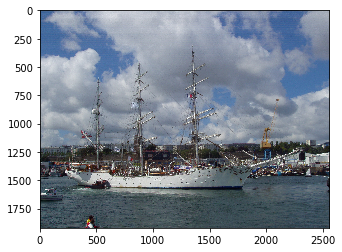

In [11]:
# 試し
%matplotlib inline
import matplotlib.pyplot as plt

img=cv2.imread("Data/Inria/jpg/123600.jpg")
imgRGB = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(imgRGB)
plt.show()

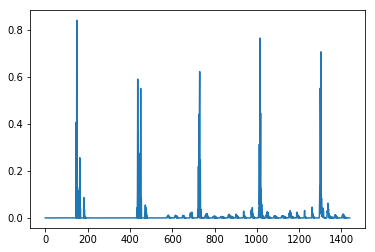

In [15]:
# ヒストグラムの表示
cd = ColorDescriptor((8, 12, 3))
features = cd.describe(img)
plt.plot(features)
plt.show()  # 288*5 = 1440 次元

### ステップ2: データセットから特徴抽出
画像記述子を定義したので、今度はデータセットのそれぞれの画像から特徴（カラーヒストグラム）を抽出する。特徴を抽出してデータベースに格納することを索引付（インデックス作成）という。

ここでは先に定義したColorDescriptorクラスを用いる。またデータセットのパスは以下では Data/Inria/jpg とし、作成した索引は Data/Inria/jpg1/index.csv"に書き込むとしておこう（実際の用途に合わせて変更する、もしくは引数としてプログラムに渡せるようにしておく）。

In [20]:
import glob
# initialize the color descriptor
cd = ColorDescriptor((8, 12, 3))

# open the output index file for writing
output = open("Data/Inria/jpg/index.csv", "w")
 
# use glob to grab the image paths and loop over them
for imagePath in glob.glob("Data/Inria/jpg/*.jpg"):
	# extract the image ID (i.e. the unique filename) from the image
	# path and load the image itself
	imageID = imagePath[imagePath.rfind("/") + 1:]
	image = cv2.imread(imagePath)
 
	# describe the image
	features = cd.describe(image)
 
	# write the features to file
	features = [str(f) for f in features]
	output.write("%s,%s\n" % (imageID, ",".join(features)))
 
# close the index file
output.close()

上のプログラムを実行すると、常に新しい Data/Inria/jpg/index.csv ファイルが作られる（画像を追加して索引作成する場合には、"w"ではなく"a"を指定すると良い）。これはテキストとして読めるエクセルファイルのようなもので、それぞれの行の先頭の項目にはファイル名、その後に特徴ベクトルを表す数のリストが続く(より高速にデータをやりとりするには、csvファイルではなく、pickleのような他の方法を考えたほうが良い）。

### ステップ３: 検索器

データセットから特徴を抽出したデータベースが作成できたので、これをクエリ画像と比較することで類似する画像を検索できるようになった。検索器のためのクラス Searcher を定義しよう。ここで中心となるのは類似度を計算する chi2_distanceメソッドである。このメソッドではカイ二乗類似度を計算する。この値にしたがって画像データを昇順に並び替え、先頭のいくつかを返せば検索器ができあがる。

In [24]:
import csv
import numpy as np

class Searcher:
	def __init__(self, indexPath):
		# store our index path
		self.indexPath = indexPath

	def search(self, queryFeatures, limit = 10):
		# initialize our dictionary of results
		results = {}
		# open the index file for reading
		with open(self.indexPath) as f:
			# initialize the CSV reader
			reader = csv.reader(f)
			# loop over the rows in the index
			for row in reader:
				# parse out the image ID and features, then compute the
				# chi-squared distance between the features in our index
				# and our query features
				features = [float(x) for x in row[1:]]
				d = self.chi2_distance(features, queryFeatures)
				# now that we have the distance between the two feature
				# vectors, we can udpate the results dictionary -- the
				# key is the current image ID in the index and the
				# value is the distance we just computed, representing
				# how 'similar' the image in the index is to our query
				results[row[0]] = d
			# close the reader
			f.close()
		# sort our results, so that the smaller distances (i.e. the
		# more relevant images are at the front of the list)
		results = sorted([(v, k) for (k, v) in results.items()])
 
		# return our (limited) results
		return results[:limit]

	def chi2_distance(self, histA, histB, eps = 1e-10):
		# compute the chi-squared distance
		d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
			for (a, b) in zip(histA, histB)])
		# return the chi-squared distance
		return d


### ステップ4: 検索を実行する
さて準備ができたので、検索してみよう。ステップ２ではInriaのファイルをデータセットとして用いたので、ここではそれとは別の画像(那智の滝の写真)を使うことにする。

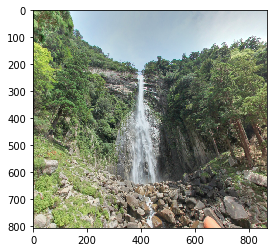

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
query = cv2.imread("Figs/NachiFall.png")
query = cv2.cvtColor(query,cv2.COLOR_RGB2BGR)
plt.imshow(query)
plt.show()

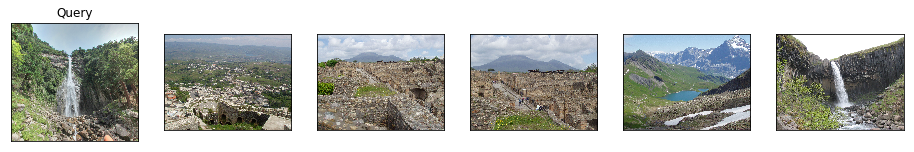

In [35]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import cv2
# ColorDescriptorクラスを使用
# Searcherクラスを使用
cd = ColorDescriptor((8, 12, 3))
# load the query image and describe it
query = cv2.imread("Figs/NachiFall.png")
features = cd.describe(query)
 
# perform the search
searcher = Searcher("Data/Inria/jpg/index.csv")
results = searcher.search(features)
 
# display the query
query = cv2.cvtColor(query,cv2.COLOR_RGB2BGR)

# loop over the results
plt.figure(figsize=(16,5))
i=1
plt.subplot(1,6,i), plt.imshow(query)
plt.title('Query'), plt.xticks([]), plt.yticks([])
for (score, resultID) in results[:5]: # best 5まで表示
	# load the result image and display it
	i += 1
	result = cv2.imread("Data/Inria/jpg/" + resultID)
	im = cv2.cvtColor(result,cv2.COLOR_RGB2BGR)
	plt.subplot(1,6,i).imshow(im), plt.xticks([]), plt.yticks([])

plt.show()

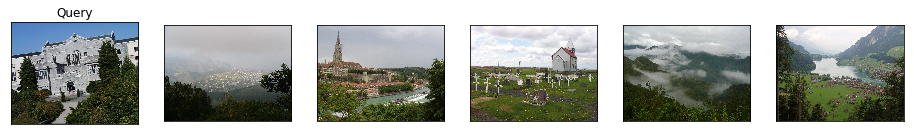

In [36]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import cv2
# ColorDescriptorクラスを使用
# Searcherクラスを使用

def imageSearch(queryPath, DataPath):
    cd = ColorDescriptor((8, 12, 3))
    # load the query image and describe it
    query = cv2.imread(queryPath)
    features = cd.describe(query)
     
    # perform the search
    searcher = Searcher(DataPath+"index.csv")
    results = searcher.search(features)
     
    # display the query
    query = cv2.cvtColor(query,cv2.COLOR_RGB2BGR)
    
    # loop over the results
    plt.figure(figsize=(16,5))
    i=1
    plt.subplot(1,6,i), plt.imshow(query)
    plt.title('Query'), plt.xticks([]), plt.yticks([])
    for (score, resultID) in results[:5]: # best 5まで表示
        # load the result image and display it
        i += 1
        result = cv2.imread(DataPath + resultID)
        im = cv2.cvtColor(result,cv2.COLOR_RGB2BGR)
        plt.subplot(1,6,i).imshow(im), plt.xticks([]), plt.yticks([])
    plt.show()

imageSearch("Data/building.png", "Data/Inria/jpg/")

最後の写真にあうような画像はInriaにはないようである。滝の写真は他にあったのだがマッチしなかった。画像の中心にあるものに重みをおくとより直感的にあったものが選ばれるかもしれない。これはあくまで画像の色調に基づくものであり、visual wordsを使ったものとか、また検索でもより高速の方法などを使うということが考えられる。